In [1]:
import numpy as np
import astropy
import matplotlib.pyplot as plt
import os
import astropy.io.fits as fits
from astropy.table import Table
from desitarget import desi_mask, bgs_mask, mws_mask, contam_mask
from desiutil.plots import prepare_data, init_sky, plot_sky_circles, plot_sky_binned
from desiutil.log import get_logger
import warnings
import mpl_toolkits
%matplotlib inline

In [2]:
topdir = os.path.join("/global/cscratch1/sd/forero/test_20170829/targets/N20/")
truthfile = os.path.join(topdir, 'truth.fits')
targetfile = os.path.join(topdir, 'targets.fits')
skyfile = os.path.join(topdir, 'sky.fits')
stdstarsfile = os.path.join(topdir, 'stdstars.fits')

In [3]:
def qadensity(cat, objtype, targdens=None, max_bin_area=10.0):
    label = '{} (targets/deg$^2$)'.format(objtype)
    if targdens:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    else:
        fig, ax = plt.subplots(1)
    ax = np.atleast_1d(ax)
    
    basemap = init_sky(galactic_plane_color='k', ax=ax[0]);
    basemap, data = plot_sky_binned(cat['RA'], cat['DEC'], max_bin_area=max_bin_area,
                                    clip_lo='!1', cmap='jet', plot_type='healpix', 
                                    label=label, basemap=basemap)
    if targdens:
        dens = data[np.nonzero(data)]
        ax[1].hist(dens, bins=40, histtype='stepfilled', alpha=0.6, label='Observed {} Density'.format(objtype))
        if objtype in targdens.keys():
            ax[1].axvline(x=targdens[objtype], ls='--', color='k', label='Goal {} Density'.format(objtype))
        ax[1].set_xlabel(label)
        ax[1].set_ylabel('Number of Healpixels')
        ax[1].legend(loc='upper left', frameon=False)
        fig.subplots_adjust(wspace=0.2)
    return dens

In [9]:
targets  = fits.getdata(targetfile)
truth = fits.getdata(truthfile)
sky = fits.getdata(skyfile)

In [5]:
# Desired target densities, including contaminants.
targdens = {'ELG': 2400, 'LRG': 350, 'QSO': 260, 'SKY': 1400}

/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


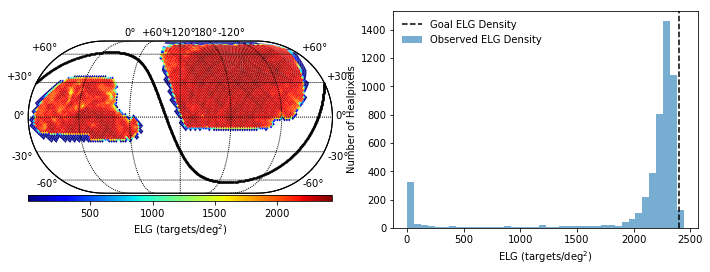

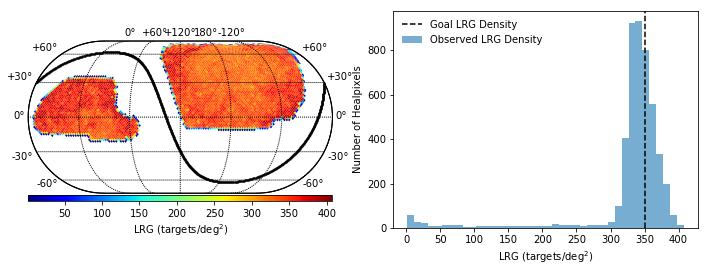

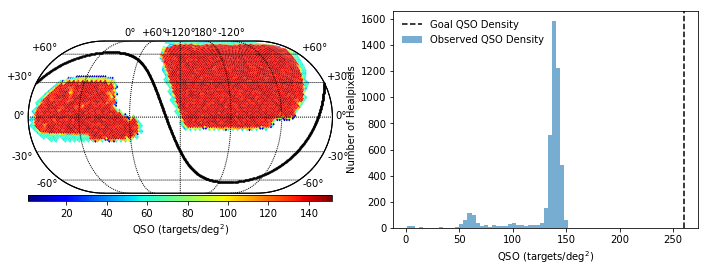

In [7]:
for obj in ['ELG','LRG','QSO']:
    these = (targets['DESI_TARGET'] & desi_mask.mask(obj)) != 0
    dd = targets[these]
    a = qadensity(dd, obj, targdens=targdens)

/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:1623: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  fill_color = ax.get_axis_bgcolor()
/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


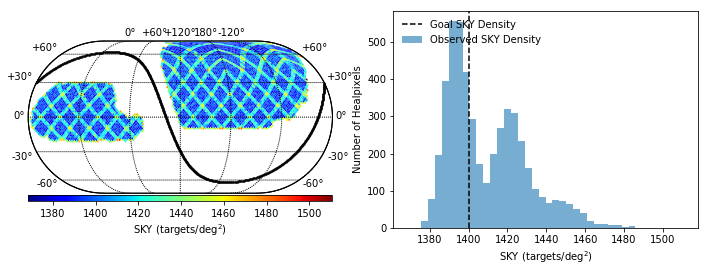

In [10]:
a = qadensity(sky, 'SKY', targdens=targdens)

These are some of the questions we want to address by exploring the simulation outputs from the `quicksurvey2017` run.

### BGS
* New redshifts obtained per month versus time. Also subdivided into by pass (1,2 or 3).
* The above separately for r<19.5 and 19.5<r<20 targets
* Distribution of exposure times
* The fraction of targets that receive a fibre versus 
    - magnitude (presumably just a step function at 19.5); 
    - density on the sky (either Healpix or the tile) 
    - RA 
    - dec 
    - galactic latitude 
    - stellar density
* The above separately for r<19.5 and 19.5<r<20 targets
* Redshift success rate versus exposure time  

In [4]:
program = 'bright'
topdir = os.path.join("/global/project/projectdirs/desi/datachallenge/quicksurvey2017/")


In [4]:
epoch = 4
zcatfile = os.path.join(topdir, 'output/{}/{}'.format(program,epoch), 'zcat.fits')
mtlfile = os.path.join(topdir, 'output/{}/{}'.format(program,epoch), 'mtl.fits')
zcat = fits.getdata(zcatfile)
mtl = fits.getdata(mtlfile)

In [5]:
Table(mtl[0:20])

TARGETID,RA,DEC,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,BRICKNAME,DECAM_FLUX [6],SHAPEDEV_R,SHAPEEXP_R,NUMOBS_MORE,PRIORITY
int64,float64,float64,int64,int64,int64,float64,float64,str8,float32,float32,float32,int32,int64
2738400090,268.652604038,79.4027746025,2305843009213693952,0,1,0.437988673436,7.0,2686p795,0.0 .. 0.0,0.0,0.0,1,1500
26209092406,198.173385356,21.6749812816,2305843009213693952,0,1,0.807002036633,7.0,1979p215,0.0 .. 0.0,0.0,0.0,0,1
60919725626,173.467925737,7.00124573249,2305843009213693952,0,1,0.150101354772,7.0,1737p070,0.0 .. 0.0,0.0,0.0,0,1
85845171584,246.263598187,5.51157124861,2305843009213693952,0,1,0.784478035568,7.0,2464p055,0.0 .. 0.0,0.0,0.0,0,1
236732131231,105.805780461,38.5635284915,2305843009213693952,0,65536,0.292730256399,7.0,1059p385,0.0 .. 0.0,0.0,0.0,1,1400
393413526423,349.22636319,-5.10545263396,2305843009213693952,0,65536,0.625729176261,7.0,3492m050,0.0 .. 0.0,0.0,0.0,0,1
449728124626,274.342568586,23.9696551819,2305843009213693952,0,1,0.207448479259,7.0,2740p240,0.0 .. 0.0,0.0,0.0,1,1500
466588379183,304.443210716,-0.222284331602,2305843009213693952,0,65536,0.505522346458,7.0,3042p000,0.0 .. 0.0,0.0,0.0,1,1400
484172012801,344.610131759,-0.971481432459,2305843009213693952,0,1,0.889036348124,7.0,3447m010,0.0 .. 0.0,0.0,0.0,0,1


In [6]:
Table(zcat[0:10])

TARGETID,BRICKNAME,SPECTYPE,Z,ZERR,ZWARN,NUMOBS
int64,str8,str10,float64,float32,int32,int32
1276091281066122850,,GALAXY,0.528246800742,6.62726e-05,0,2
1285007463057024381,,GALAXY,0.531850555784,6.64218e-05,0,2
189564715499625139,,GALAXY,0.473061661552,6.38779e-05,0,2
2772465396524512311,,GALAXY,0.510526978752,6.55009e-05,0,2
1428907291782510936,,GALAXY,0.479123315121,6.41411e-05,0,2
3957235724805539223,,GALAXY,0.478253816146,6.41009e-05,0,2
4505957380923513183,,GALAXY,0.505045926429,6.52675e-05,0,2
652890277386728375,,GALAXY,0.444419634011,6.2636e-05,0,2
1009275581793229329,,GALAXY,0.431515951853,6.20717e-05,0,1


In [6]:
Table(truth[0:10])

TARGETID,MOCKID,CONTAM_TARGET,TRUEZ,TRUESPECTYPE,TEMPLATETYPE,TEMPLATESUBTYPE,TEMPLATEID,SEED,MAG,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,OIIFLUX,HBETAFLUX,TEFF,LOGG,FEH
int64,int64,int64,float32,str10,str10,str10,int32,int64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
288230376151711744,3435553,0,0.227755,GALAXY,BGS,,-1,1631042963,18.8726,13.6382,28.2456,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
288230376151711745,3681369,0,0.409447,GALAXY,BGS,,-1,3675577821,19.6926,8.01412,13.2724,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
288230376151711746,3758867,0,0.346595,GALAXY,BGS,,-1,4179643290,19.6241,6.28144,14.1373,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
288230376151711747,4057182,0,0.408964,GALAXY,BGS,,-1,1966235164,19.9671,4.42866,10.3073,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
288230376151711748,4098589,0,0.185615,GALAXY,BGS,,-1,2251306174,17.8357,30.9164,73.4007,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
288230376151711749,4098628,0,0.185064,GALAXY,BGS,,-1,2781645777,19.2039,8.72537,20.8182,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
288230376151711750,4098656,0,0.185079,GALAXY,BGS,,-1,4037105050,19.7637,7.731,12.4317,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
288230376151711751,4151045,0,0.184667,GALAXY,BGS,,-1,1848358425,19.9228,5.25413,10.7365,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
288230376151711752,4151072,0,0.187204,GALAXY,BGS,,-1,375392059,18.0323,27.5729,61.2488,0.0,0.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [8]:
Table(targets[0:10])

BRICKID,BRICKNAME,BRICK_OBJID,RA,DEC,FLUX_G,FLUX_R,FLUX_Z,FLUX_W1,FLUX_W2,SHAPEEXP_R,SHAPEEXP_E1,SHAPEEXP_E2,SHAPEDEV_R,SHAPEDEV_E1,SHAPEDEV_E2,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,HPXPIXEL,SUBPRIORITY,OBSCONDITIONS
int32,str8,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int64,int64,int64,int64,int64,float64,int64
385021,0337p095,0,33.8212585449,9.58619117737,13.6319,28.3061,0.0391121,-1.85411,-0.163243,0.0,0.0,0.0,0.0,0.0,0.0,24.6385,24.2834,23.6564,24.4389,23.8073,23.4168,0.76526,0.835088,0.903356,0.9848,0.990638,288230376151711744,1152921504606846976,131074,0,0,0.979912771246,4
385021,0337p095,1,33.8478813171,9.55519485474,7.97828,13.2531,-0.0586349,-2.11215,0.253249,0.0,0.0,0.0,0.0,0.0,0.0,24.6385,24.2834,23.6564,24.4389,23.8073,23.4168,0.757088,0.82907,0.899679,0.984195,0.990264,288230376151711745,1152921504606846976,65537,0,0,0.588311164688,7
385021,0337p095,2,33.8632316589,9.56018638611,6.33612,14.2181,-0.194035,0.568439,-0.359861,0.0,0.0,0.0,0.0,0.0,0.0,24.6385,24.2834,23.6564,24.4389,23.8073,23.4168,0.756064,0.828315,0.899217,0.984119,0.990217,288230376151711746,1152921504606846976,65537,0,0,0.960822014192,7
385021,0337p095,3,33.7754554749,9.59417915344,4.43743,10.3168,0.0800984,0.976871,-0.361479,0.0,0.0,0.0,0.0,0.0,0.0,24.6385,24.2834,23.6564,24.4389,23.8073,23.4168,0.767056,0.836407,0.904161,0.984932,0.990719,288230376151711747,1152921504606846976,65537,0,0,0.00700909702917,7
385021,0337p095,4,33.9093170166,9.51505470276,30.9054,73.5126,0.224147,-0.552717,0.102923,0.0,0.0,0.0,0.0,0.0,0.0,24.6385,24.2834,23.6564,24.4389,23.8073,23.4168,0.746927,0.821558,0.895073,0.983434,0.989794,288230376151711748,1152921504606846976,131074,0,0,0.324829770315,4
385021,0337p095,5,33.8325271606,9.56978797913,8.71643,20.8458,-0.176652,2.03895,-0.206021,0.0,0.0,0.0,0.0,0.0,0.0,24.6385,24.2834,23.6564,24.4389,23.8073,23.4168,0.762026,0.832708,0.901904,0.984561,0.99049,288230376151711749,1152921504606846976,131074,0,0,0.739168118127,4
385021,0337p095,6,33.8595581055,9.55342674255,7.74498,12.4422,-0.0314322,2.23299,-0.259305,0.0,0.0,0.0,0.0,0.0,0.0,24.6385,24.2834,23.6564,24.4389,23.8073,23.4168,0.754625,0.827252,0.898566,0.984011,0.99015,288230376151711750,1152921504606846976,65537,0,0,0.428560792918,7
385021,0337p095,7,33.9092826843,9.50134754181,5.21374,10.7809,-0.0672822,2.72257,0.521868,0.0,0.0,0.0,0.0,0.0,0.0,24.6385,24.2834,23.6564,24.4389,23.8073,23.4168,0.745007,0.820134,0.894198,0.983289,0.989704,288230376151711751,1152921504606846976,65537,0,0,0.9481428441,7
385021,0337p095,8,33.9177818298,9.47415447235,27.5841,61.1984,-0.0933667,-0.665772,0.211293,0.0,0.0,0.0,0.0,0.0,0.0,24.6385,24.2834,23.6564,24.4389,23.8073,23.4168,0.743708,0.819171,0.893605,0.983191,0.989643,288230376151711752,1152921504606846976,131074,0,0,0.00130561466015,4


In [11]:
bgsfaint_ii = (targets['DESI_TARGET'] == desi_mask.mask('BGS_ANY'))
#bgsfaint_ii &= (targets['RA']>120.0) & (targets['RA']<200.0)
#bgsfaint_ii &= (targets['DEC']<30.0) & (targets['DEC']>10.0)
print(np.count_nonzero(bgsfaint_ii))

20904798


In [9]:
bgsfaint_targets = targets[bgsfaint_ii]

ii = np.in1d(zcat['TARGETID'], bgsfaint_targets['TARGETID'])
bgsfaint_zcat = zcat[ii]

ii = np.in1d(truth['TARGETID'], bgsfaint_targets['TARGETID'])
bgsfaint_truth = truth[ii]

In [10]:
bgsbright_ii = (targets['BGS_TARGET'] == bgs_mask.mask('BGS_BRIGHT'))
bgsbright_ii &= (targets['RA']>120.0) & (targets['RA']<200.0)
bgsbright_ii &= (targets['DEC']<30.0) & (targets['DEC']>10.0)
print(np.count_nonzero(bgsbright_ii))

1227028


In [11]:
bgsbright_targets = targets[bgsbright_ii]

ii = np.in1d(zcat['TARGETID'], bgsbright_targets['TARGETID'])
bgsbright_zcat = zcat[ii]

ii = np.in1d(truth['TARGETID'], bgsbright_targets['TARGETID'])
bgsbright_truth = truth[ii]

In [12]:
assert len(bgsfaint_truth) == len(bgsfaint_targets)
assert len(bgsbright_truth) == len(bgsbright_targets)

In [13]:
#efficiency as a function of redshift (using truth info)
bgsfaint_truez = bgsfaint_truth['TRUEZ']
bgsbright_truez = bgsbright_truth['TRUEZ']

n_edges = 11
n_bin = n_edges -1
zbin = np.linspace(0.0, 0.6, n_edges)
z_center = (zbin[0:-1]+zbin[1:])/2


n_in = np.ones(n_bin)
n_out_good = np.ones(n_bin)
n_out_all = np.ones(n_bin)


spectype = 'GALAXY'
for i in range(n_bin):
    ii = (bgsfaint_truth['TRUETYPE']==spectype) 
    ii &= (bgsfaint_truth['TRUEZ']>zbin[i]) 
    ii &= (bgsfaint_truth['TRUEZ']<zbin[i+1])
    
    jj = (bgsfaint_zcat['ZWARN']==0) & (bgsfaint_zcat['SPECTYPE']==spectype) 
    jj &= (bgsfaint_zcat['Z']>zbin[i]) & (bgsfaint_zcat['Z']<zbin[i+1])

    kk = (bgsfaint_zcat['SPECTYPE']==spectype) 
    kk &= (bgsfaint_zcat['Z']>zbin[i]) & (bgsfaint_zcat['Z']<zbin[i+1])
    
    n_in[i] = np.count_nonzero(ii)
    n_out_good[i] = np.count_nonzero(jj)
    n_out_all[i] = np.count_nonzero(kk)

final = np.array([z_center, n_in, n_out_all, n_out_good])
np.savetxt("eff_bgs_faint_epoch_{}.dat".format(epoch), final.T, 
           header='zcenter, n_in, n_out_all, n_out_good', fmt="%.2f %d %d %d")

for i in range(n_bin):
    ii = (bgsbright_truth['TRUETYPE']==spectype) 
    ii &= (bgsbright_truth['TRUEZ']>zbin[i]) 
    ii &= (bgsbright_truth['TRUEZ']<zbin[i+1])
    
    jj = (bgsbright_zcat['ZWARN']==0) & (bgsbright_zcat['SPECTYPE']==spectype) 
    jj &= (bgsbright_zcat['Z']>zbin[i]) & (bgsbright_zcat['Z']<zbin[i+1])

    kk = (bgsbright_zcat['SPECTYPE']==spectype) 
    kk &= (bgsbright_zcat['Z']>zbin[i]) & (bgsbright_zcat['Z']<zbin[i+1])
    
    n_in[i] = np.count_nonzero(ii)
    n_out_good[i] = np.count_nonzero(jj)
    n_out_all[i] = np.count_nonzero(kk)
    
final = np.array([z_center, n_in, n_out_all, n_out_good])
np.savetxt("eff_bgs_bright_epoch_{}.dat".format(epoch), final.T, 
           header='zcenter, n_in, n_out_all, n_out_good', fmt="%.2f %d %d %d")

In [14]:
!cat eff_bgs_bright_epoch_0.dat
!cat eff_bgs_faint_epoch_0.dat
!cat eff_bgs_bright_epoch_1.dat
!cat eff_bgs_faint_epoch_1.dat

# zcenter, n_in, n_out_all, n_out_good
0.03 52477 21156 20762
0.09 179771 68406 67075
0.15 268237 94922 93083
0.21 274137 100450 98435
0.27 218512 78353 76740
0.33 142522 52322 51244
0.39 66749 24357 23873
0.45 20603 7824 7670
0.51 3561 1377 1353
0.57 350 144 141
# zcenter, n_in, n_out_all, n_out_good
0.03 5571 1905 1888
0.09 36049 12248 12120
0.15 88773 27801 27444
0.21 148017 46074 45530
0.27 179183 55438 54819
0.33 180031 58012 57344
0.39 136022 43376 42887
0.45 73778 24383 24155
0.51 25554 8648 8566
0.57 5506 1706 1685
# zcenter, n_in, n_out_all, n_out_good
0.03 52477 49966 48990
0.09 179771 168122 164765
0.15 268237 249193 244311
0.21 274137 255761 250617
0.27 218512 205305 201101
0.33 142522 134855 132100
0.39 66749 63694 62424
0.45 20603 19807 19390
0.51 3561 3441 3377
0.57 350 340 333
# zcenter, n_in, n_out_all, n_out_good
0.03 5571 5486 5464
0.09 36049 35406 35282
0.15 88773 86760 86427
0.21 148017 144561 143988
0.27 179183 175801 175168
0.33 180031 176439 175813
0.39 136022 1

In [15]:
unique, counts = np.unique(bgsfaint_zcat['NUMOBS'][jj], return_counts=True)
dict(zip(unique, counts))

/global/common/cori/contrib/desi/desiconda/20170613-1.1.4-spectro/code/desiconda/20170613-1.1.4-spectro_conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 880318 but corresponding boolean dimension is 1150590
  if __name__ == '__main__':


IndexError: index 884846 is out of bounds for axis 1 with size 880318

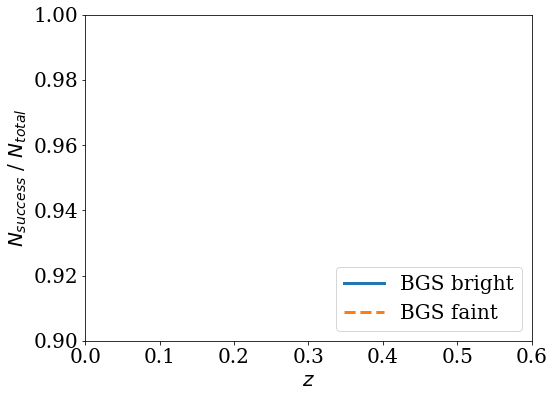

In [160]:
fig = plt.figure(1, figsize=(8,6))
plt.rc('font', family='serif', size=20)
plt.plot(z_center, bgsbright_eff, label='BGS bright', linewidth=3, linestyle='-')
plt.plot(z_center, bgsfaint_eff, label='BGS faint', linewidth=3, linestyle='--')
plt.xlabel('$z$')
plt.ylabel('$N_{success}$ / $N_{total}$')
plt.legend(loc=4)
plt.xlim([0,0.60])
plt.ylim([0.9,1.0])
#plt.title("Results after the first 7 months of operation")
plt.savefig("bgs_redshift_success_0.pdf", bbox_inches='tight')

# Dark Survey

In [2]:
program = 'dark'
topdir = os.path.join("/hpcfs/home/ciencias/fisica/docentes/je.forero/desidata/test_20170508/")
truthfile = os.path.join(topdir, 'input/{}/'.format(program), 'truth.fits')
targetfile = os.path.join(topdir, 'input/{}/'.format(program), 'targets.fits')
zcatfile = os.path.join(topdir, 'output/{}/4'.format(program), 'zcat.fits')
skyfile = os.path.join(topdir, 'input/{}/'.format(program), 'sky.fits')
stdstarsfile = os.path.join(topdir, 'input/{}/'.format(program), 'stdstars.fits')

In [3]:
targets  = fits.getdata(targetfile)

In [4]:
Table(targets[:10])

TARGETID,RA,DEC,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,BRICKNAME,DECAM_FLUX [6],SHAPEDEV_R,SHAPEEXP_R,DEPTH_R,GALDEPTH_R
int64,float64,float64,int64,int64,int64,float64,float64,str8,float32,float32,float32,float32,float32
1913083273142325984,9.59603287191,-7.96864299891,4,0,0,0.874412621321,1.0,0098m080,0.0 .. 0.0,0.0,0.0,24.7716,24.4795
2771587901724092043,2.46544022805,-14.7033657602,4,0,0,0.339985051046,1.0,0023m145,0.0 .. 0.0,0.0,0.0,23.9023,23.6205
969669320400918333,5.65710217668,-8.69037459083,4,0,0,0.19649634412,1.0,0057m085,0.0 .. 0.0,0.0,0.0,21.9372,21.7386
3524774154980433357,9.52008938818,-8.14619205472,4,0,0,0.689182304402,1.0,0093m080,0.0 .. 0.0,0.0,0.0,24.8698,24.5472
3815924188513168547,9.87313688016,-5.47601742467,4,0,0,0.412090351859,1.0,0097m055,0.0 .. 0.0,0.0,0.0,24.6583,24.3936
2574966351288023565,3.72897315425,-13.201883338,4,0,0,0.0331880302021,1.0,0038m130,0.0 .. 0.0,0.0,0.0,24.9373,24.6974
3910964841860800689,5.42150220456,-10.2811286749,4,0,0,0.0367054553279,1.0,0053m105,0.0 .. 0.0,0.0,0.0,24.7737,24.4967
2839749178270131820,6.71776150313,-10.8874062533,4,0,0,0.8465572925,1.0,0068m110,0.0 .. 0.0,0.0,0.0,23.7261,23.4912
494347467813955667,2.29951992127,-11.226112242,4,0,0,0.524939003802,1.0,0022m110,0.0 .. 0.0,0.0,0.0,24.2043,23.9255


In [5]:
def qadensity(cat, objtype, targdens=None, max_bin_area=10.0):
    label = '{} (targets/deg$^2$)'.format(objtype)
    if targdens:
        fig, ax = plt.subplots(1, 2, figsize=(12, 4))
    else:
        fig, ax = plt.subplots(1)
    ax = np.atleast_1d(ax)
    
    basemap = init_sky(galactic_plane_color='k', ax=ax[0]);
    basemap, data = plot_sky_binned(cat['RA'], cat['DEC'], max_bin_area=max_bin_area,
                                    clip_lo='!1', cmap='jet', plot_type='healpix', 
                                    label=label, basemap=basemap)
    if targdens:
        dens = data[np.nonzero(data)]
        ax[1].hist(dens, bins=40, histtype='stepfilled', alpha=0.6, label='Observed {} Density'.format(objtype))
        if objtype in targdens.keys():
            ax[1].axvline(x=targdens[objtype], ls='--', color='k', label='Goal {} Density'.format(objtype))
        ax[1].set_xlabel(label)
        ax[1].set_ylabel('Number of Healpixels')
        ax[1].legend(loc='upper left', frameon=False)
        fig.subplots_adjust(wspace=0.2)
    return dens

In [6]:
# Desired target densities, including contaminants.
targdens = {'ELG': 2400, 'LRG': 350, 'QSO': 260, 'SKY': 1400}

In [12]:
for obj in ['ELG','LRG','QSO']:
    these = (targets['DESI_TARGET'] & desi_mask.mask(obj)) != 0
    dd = targets[these]
    a = qadensity(dd, obj, targdens=targdens)

KeyboardInterrupt: 

In [8]:
sky  = fits.getdata(skyfile)

In [9]:
Table(sky[:10])

TARGETID,RA,DEC,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,BRICKNAME
int64,float64,float64,int64,int64,int64,float64,float64,str8
847059552979818045,145.739776611,14.1148290634,4294967296,0,0,0.137284754593,7.0,1457p140
113248706240611123,234.913635254,34.0901298523,4294967296,0,0,0.105008817214,7.0,2349p340
2994809343532731068,19.7740898132,5.02604961395,4294967296,0,0,0.833754140881,7.0,0198p050
3557963051456115431,143.500137329,70.9557037354,4294967296,0,0,0.00299365549984,7.0,1429p710
3608696163881758674,26.6104316711,14.5823869705,4294967296,0,0,0.900498026228,7.0,0265p145
2082938370702717937,8.97276592255,-5.65229272842,4294967296,0,0,0.338785405271,7.0,0087m055
3005958361453749994,327.609344482,8.20268726349,4294967296,0,0,0.217031425079,7.0,3274p080
763434001029505907,172.737503052,6.86790084839,4294967296,0,0,0.112156267676,7.0,1727p070
4442474944884096078,223.455322266,21.3809604645,4294967296,0,0,0.208572239683,7.0,2236p215


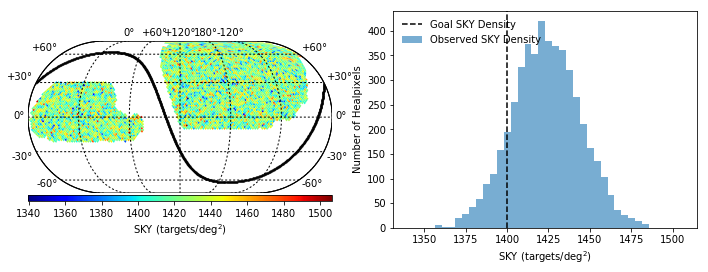

In [11]:
stdstars  = fits.getdata(stdstarsfile)

In [12]:
Table(stdstars[:10])

TARGETID,RA,DEC,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,BRICKNAME
int64,float64,float64,int64,int64,int64,float64,float64,str8
257733321435202562,8.04194677586,-13.4505378348,8589934592,0,0,0.109953814235,7.0,0079m135
3963063933366171878,1.68180853392,-5.98014031153,8589934592,0,0,0.479076933916,7.0,0017m060
953162882498759315,8.27662921784,-5.6442883131,8589934592,0,0,0.274796774965,7.0,0082m055
934477131090988370,8.97825774448,-11.3710881689,8589934592,0,0,0.026729235691,7.0,0088m115
3496543140219928248,7.64731417299,-12.8674511458,8589934592,0,0,0.33889129482,7.0,0074m130
4399880739973084079,2.65673618694,-14.2071609038,8589934592,0,0,0.183426189336,7.0,0028m140
4398890563398508994,2.63616404354,-8.21282450869,8589934592,0,0,0.981103754703,7.0,0027m080
2873903332299811057,3.14815807228,-6.25421669657,8589934592,0,0,0.0741276506663,7.0,0032m065
1679054201284745074,8.7283628457,-7.59919552326,8589934592,0,0,0.363230148632,7.0,0087m075


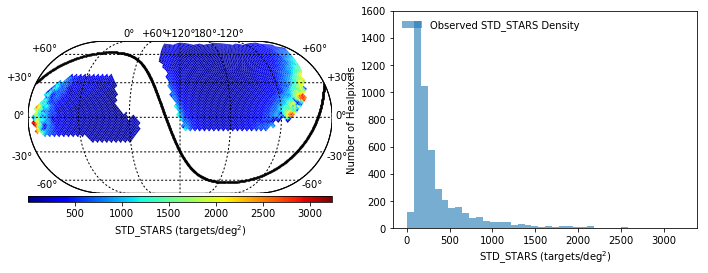

In [13]:
a = qadensity(stdstars, 'STD_STARS', targdens=targdens)

In [14]:
truth  = fits.getdata(truthfile)

In [15]:
Table(truth[:10])

TARGETID,RA,DEC,TRUEZ,TRUETYPE,SOURCETYPE,BRICKNAME,OIIFLUX
int64,float64,float64,float64,str10,str10,str8,float64
1913083273142325984,9.59603287191,-7.96864299891,4.80039780086e-05,STAR,QSO,0098m080,0.0
2771587901724092043,2.46544022805,-14.7033657602,6.62120583002e-05,STAR,QSO,0023m145,0.0
969669320400918333,5.65710217668,-8.69037459083,2.42569913098e-05,STAR,QSO,0057m085,0.0
3524774154980433357,9.52008938818,-8.14619205472,5.42776288057e-05,STAR,QSO,0093m080,0.0
3815924188513168547,9.87313688016,-5.47601742467,6.16636389168e-05,STAR,QSO,0097m055,0.0
2574966351288023565,3.72897315425,-13.201883338,2.29916677199e-05,STAR,QSO,0038m130,0.0
3910964841860800689,5.42150220456,-10.2811286749,4.0815819375e-05,STAR,QSO,0053m105,0.0
2839749178270131820,6.71776150313,-10.8874062533,6.42264785711e-05,STAR,QSO,0068m110,0.0
494347467813955667,2.29951992127,-11.226112242,0.000103471109469,STAR,QSO,0022m110,0.0


In [16]:
print(set(truth['TRUETYPE']))

{'GALAXY', 'QSO', 'STAR'}


In [17]:
print(set(truth['SOURCETYPE']))

{'QSO', 'LRG', 'ELG'}


In [18]:
zcat = fits.getdata(zcatfile)

In [19]:
Table(zcat[:10])

TARGETID,BRICKNAME,SPECTYPE,Z,ZERR,ZWARN,NUMOBS
int64,str8,str10,float64,float32,int32,int32
2839749178270131820,,STAR,-2.96298555511e-05,6.00454e-05,0,1
1623952395678799911,,STAR,0.000180741169096,6.00485e-05,0,1
4065549967834671323,,STAR,0.000187286610783,6.00435e-05,0,1
502182197015564246,,STAR,8.68219955596e-05,6.00426e-05,0,1
2721882347830478322,,STAR,9.18056618943e-05,6.00459e-05,0,1
3563747268534601935,,STAR,8.58258566217e-05,6.00478e-05,0,1
2367940352441509479,,STAR,3.03406574576e-05,6.00417e-05,0,1
2956723065468913643,,STAR,0.00012724683673,6.00444e-05,0,1
3623063040593847008,,STAR,7.49692058037e-05,6.00463e-05,0,1


In [20]:
print(set(zcat['SPECTYPE']))

{'GALAXY', 'QSO', 'STAR'}


In [21]:
these = (zcat['SPECTYPE']=='GALAXY') & (zcat['ZWARN']==0)
#    observed_id = 
#    dd = zcat[these]
#    a = qadensity(dd, obj, targdens=targdens)

In [22]:
observed_id = zcat['TARGETID'][these]

In [23]:
id_list = np.in1d(truth['TARGETID'], observed_id)

In [24]:
dd = targets[id_list]

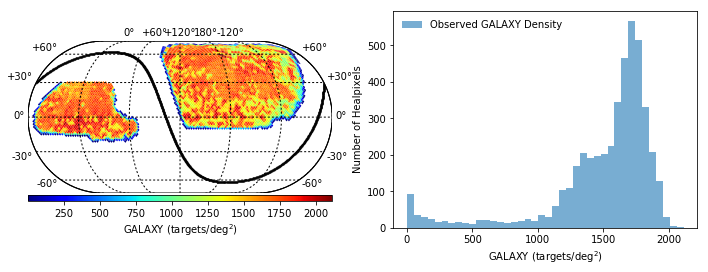

In [25]:
obj = 'GALAXY'
a = qadensity(dd, obj, targdens=targdens)

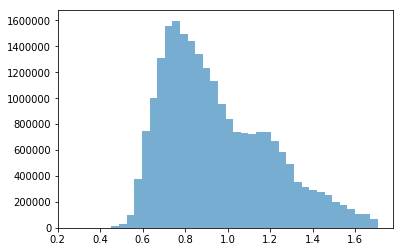

In [26]:
redshift = zcat['Z'][these]
a = plt.hist(redshift, bins=40, histtype='stepfilled', alpha=0.6)

In [27]:
these = (zcat['SPECTYPE']=='QSO') & (zcat['ZWARN']==0)
observed_id = zcat['TARGETID'][these]
id_list = np.in1d(truth['TARGETID'], observed_id)
dd = targets[id_list]

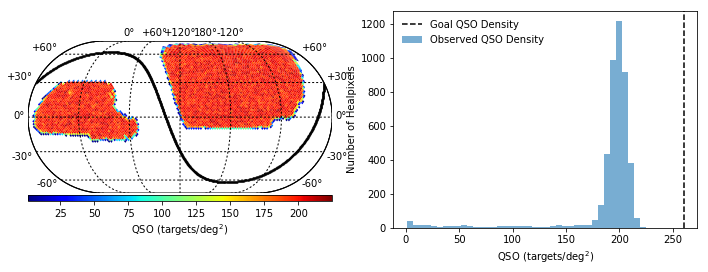

In [28]:
obj = 'QSO'
a = qadensity(dd, obj, targdens=targdens, max_bin_area=10.0)

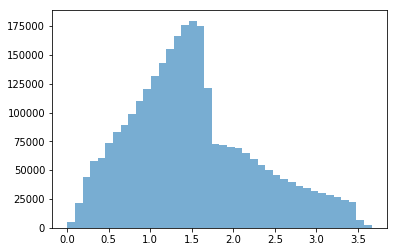

In [29]:
redshift = zcat['Z'][these]
a = plt.hist(redshift, bins=40, histtype='stepfilled', alpha=0.6)

In [30]:
these = (zcat['SPECTYPE']=='STAR') & (zcat['ZWARN']==0)
observed_id = zcat['TARGETID'][these]
id_list = np.in1d(truth['TARGETID'], observed_id)
dd = targets[id_list]

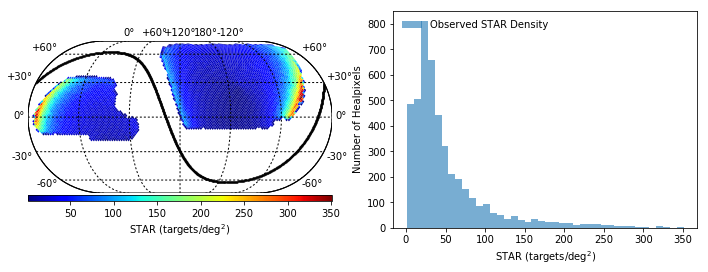

In [31]:
obj = 'STAR'
a = qadensity(dd, obj, targdens=targdens, max_bin_area=10.0)

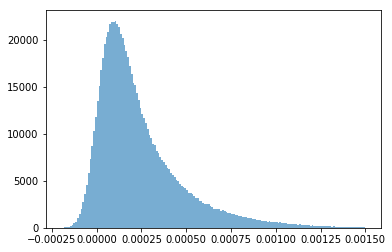

In [32]:
redshift = zcat['Z'][these]
a = plt.hist(redshift, bins=170, range=(-0.0002, 0.0015), histtype='stepfilled', alpha=0.6)

# Bright Survey

In [33]:
program = 'bright'
topdir = os.path.join("/hpcfs/home/ciencias/fisica/docentes/je.forero/desidata/test_20170508/")
truthfile = os.path.join(topdir, 'input/{}/'.format(program), 'truth.fits')
targetfile = os.path.join(topdir, 'input/{}/'.format(program), 'targets.fits')
zcatfile = os.path.join(topdir, 'output/{}/4'.format(program), 'zcat.fits')
skyfile = os.path.join(topdir, 'input/{}/'.format(program), 'sky.fits')
stdstarsfile = os.path.join(topdir, 'input/{}/'.format(program), 'stdstars.fits')

In [34]:
targets  = fits.getdata(targetfile)

In [35]:
Table(targets[:10])

TARGETID,RA,DEC,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,BRICKNAME,DECAM_FLUX [6],SHAPEDEV_R,SHAPEEXP_R,DEPTH_R,GALDEPTH_R
int64,float64,float64,int64,int64,int64,float64,float64,str8,float32,float32,float32,float32,float32
1431584650896930790,48.1787109375,-11.7159633636,1152921504606846976,1,0,0.182834724693,4.0,0480m115,0.0 .. 0.0,0.0,1.71473,23.804,23.3959
1796508898612104385,66.6035766602,-13.420747757,1152921504606846976,1,0,0.170043676625,4.0,0664m135,0.0 .. 0.0,1.31961,0.0,24.6837,24.3041
1276091281066122850,58.9786109924,-10.7227106094,1152921504606846976,1,0,0.583175164606,4.0,0590m105,0.0 .. 0.0,2.0331,0.0,23.7071,23.2984
3606257396475497747,29.592376709,-11.1409330368,1152921504606846976,2,0,0.688106945325,4.0,0297m110,0.0 .. 0.0,1.83026,0.0,24.6733,24.4623
1285007463057024381,29.7187690735,-11.2244119644,1152921504606846976,1,0,0.911364324933,4.0,0297m110,0.0 .. 0.0,1.26603,0.0,24.6733,24.4623
2939730867216479813,52.1293869019,-16.7346458435,1152921504606846976,1,0,0.0326515132353,4.0,0522m165,0.0 .. 0.0,0.0,0.324524,24.3116,24.0998
189564715499625139,29.3674163818,-16.1626281738,1152921504606846976,1,0,0.702217723413,4.0,0293m160,0.0 .. 0.0,0.8538,0.0,24.8704,24.53
2772465396524512311,11.6412878036,-3.98226714134,1152921504606846976,1,0,0.865096361183,4.0,0117m040,0.0 .. 0.0,0.0,1.20311,24.618,24.2679
795277699752288205,0.169604703784,-7.06302452087,1152921504606846976,1,0,0.0561450327098,4.0,0002m070,0.0 .. 0.0,138.199,0.0,20.7395,20.4429


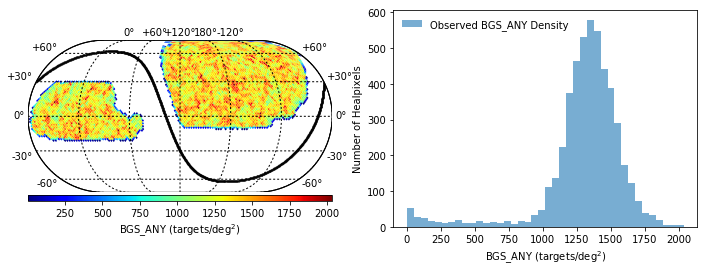

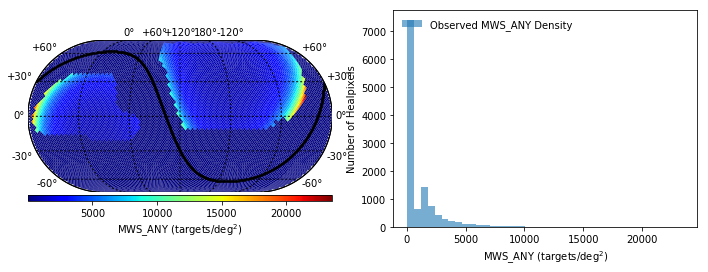

In [36]:
for obj in ['BGS_ANY', 'MWS_ANY']:
    these = (targets['DESI_TARGET'] & desi_mask.mask(obj)) != 0
    dd = targets[these]
    a = qadensity(dd, obj, targdens=targdens)

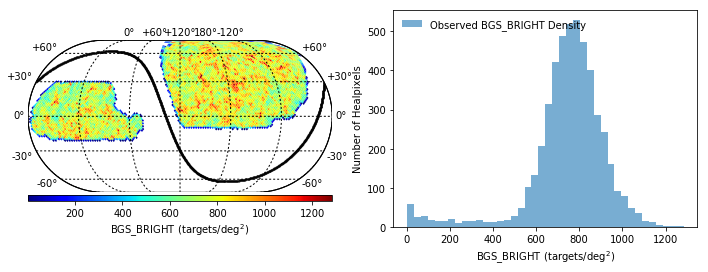

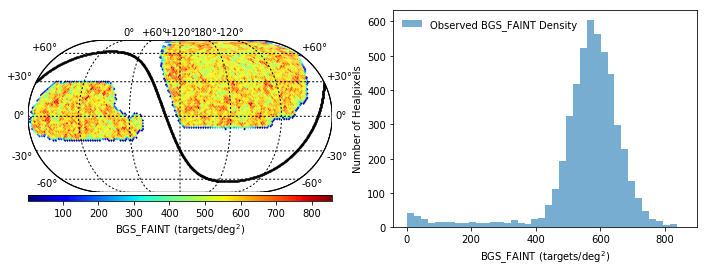

In [37]:
for obj in ('BGS_BRIGHT', 'BGS_FAINT'):
    these = (targets['BGS_TARGET'] & bgs_mask.mask(obj)) != 0
    dd = targets[these]
    a = qadensity(dd, obj, targdens=targdens)

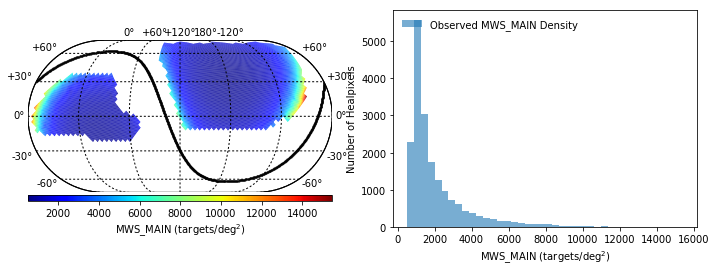

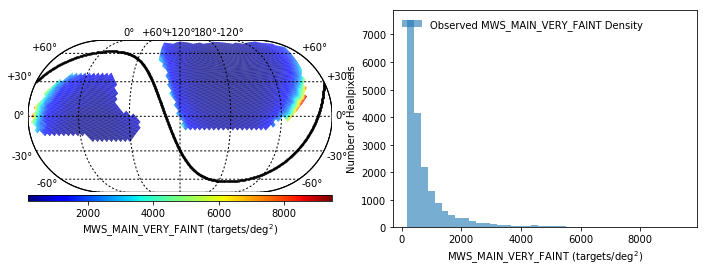

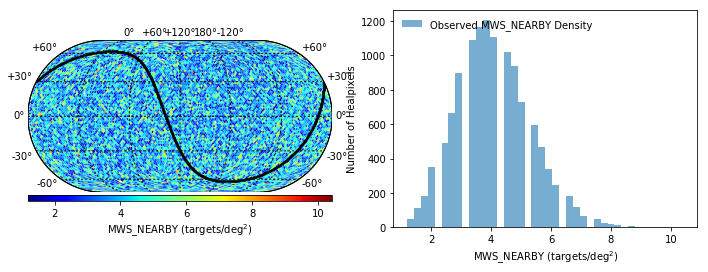

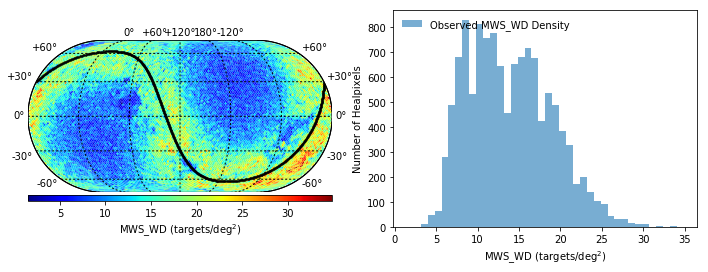

In [38]:
binarea = (2.0, 2.0, 10.0, 10.0) # [deg2]
for obj, area in zip( ('MWS_MAIN', 'MWS_MAIN_VERY_FAINT', 'MWS_NEARBY', 'MWS_WD'), binarea ):
    these = (targets['MWS_TARGET'] & mws_mask.mask(obj)) != 0
    dd = targets[these]
    a = qadensity(dd, obj, targdens=targdens, max_bin_area=area)

In [39]:
zcat = fits.getdata(zcatfile)
truth = fits.getdata(truthfile)

In [40]:
print(set(zcat['SPECTYPE']))

{'GALAXY', 'STAR'}


In [41]:
these = (zcat['SPECTYPE']=='GALAXY') & (zcat['ZWARN']==0)
observed_id = zcat['TARGETID'][these]
id_list = np.in1d(truth['TARGETID'], observed_id)
dd = targets[id_list]

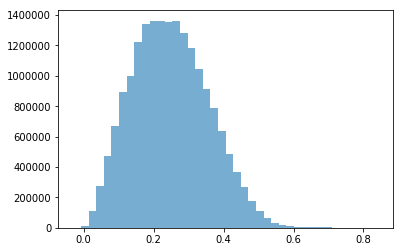

In [42]:
redshift = zcat['Z'][these]
a = plt.hist(redshift, bins=40, histtype='stepfilled', alpha=0.6)